# Exam Project: The formation of ISIS' Social Media Network
Group members: Zeyu Zhao, Helge Zille, Edith Zink, Sina Smid
# Descriptive Analysis - Words

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

from our_functions import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # makes the bar charts red on grey background with grid, I think it is nice
default_red = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']


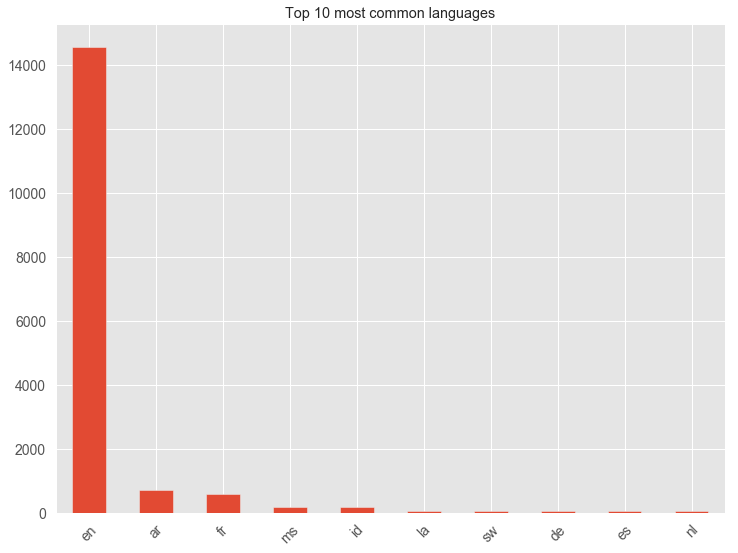

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
%run ./cleaning_18052019.ipynb

In [4]:
all_words = [item for sublist in df.words_in_tweet for item in sublist]
all_words2 = [item for sublist in df.tweets_lemm for item in sublist]
all_words3 = [item for sublist in df.tokens for item in sublist]

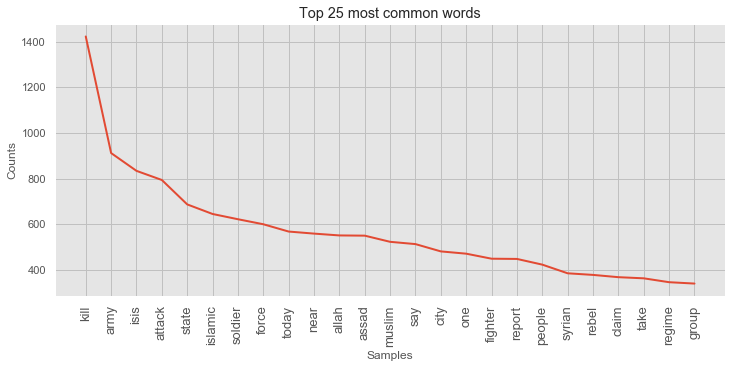

<Figure size 432x288 with 0 Axes>

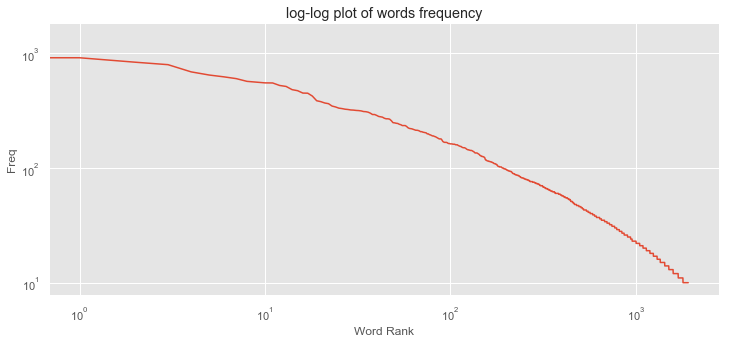

In [26]:
# plot word frequency distribution of first few words - RAW TWEETS
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
plt.savefig('figures_exam_project/top25.png')
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')
plt.savefig('figures_exam_project/top25_log.png')

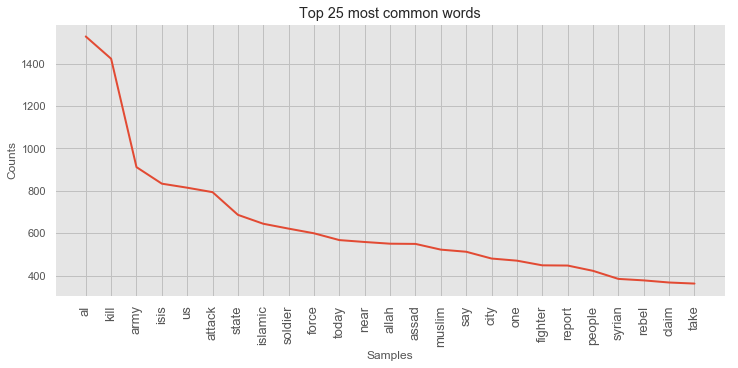

<Figure size 432x288 with 0 Axes>

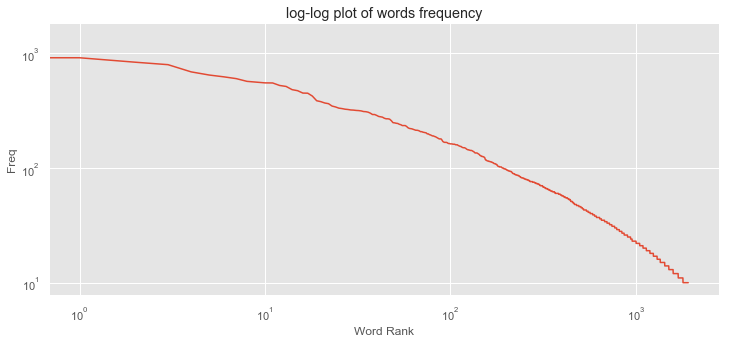

In [27]:
# plot word frequency distribution of first few words - TWEETS LEMMATIZED
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words2)
fd.plot(25,cumulative=False)
plt.savefig('figures_exam_project/top25_lem.png')
# log-log plot
word_counts2 = sorted(Counter(all_words2).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')
plt.savefig('figures_exam_project/top25_lem_log.png')

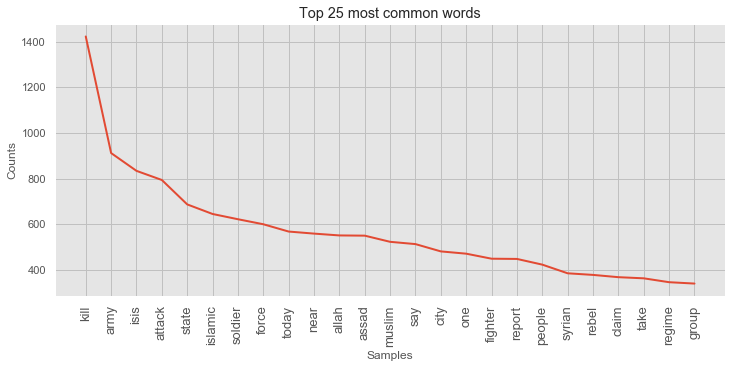

<Figure size 432x288 with 0 Axes>

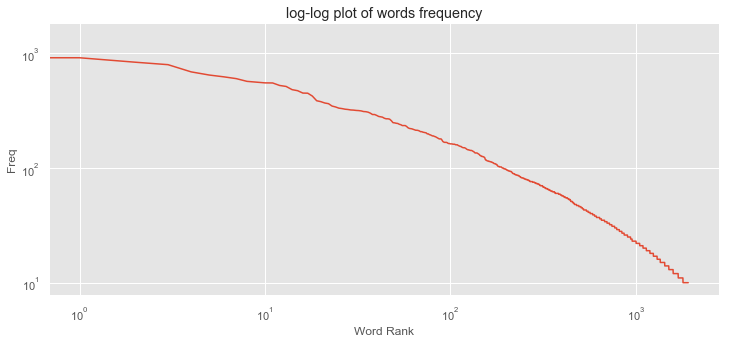

In [30]:
# plot word frequency distribution of first few words - TOKENS
f=plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words3)
f=fd.plot(25,cumulative=False)
plt.savefig('figures_exam_project/top25_tokens.png')
# log-log plot
word_counts2 = sorted(Counter(all_words3).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')
plt.savefig('figures_exam_project/top25_tokens_log.png')

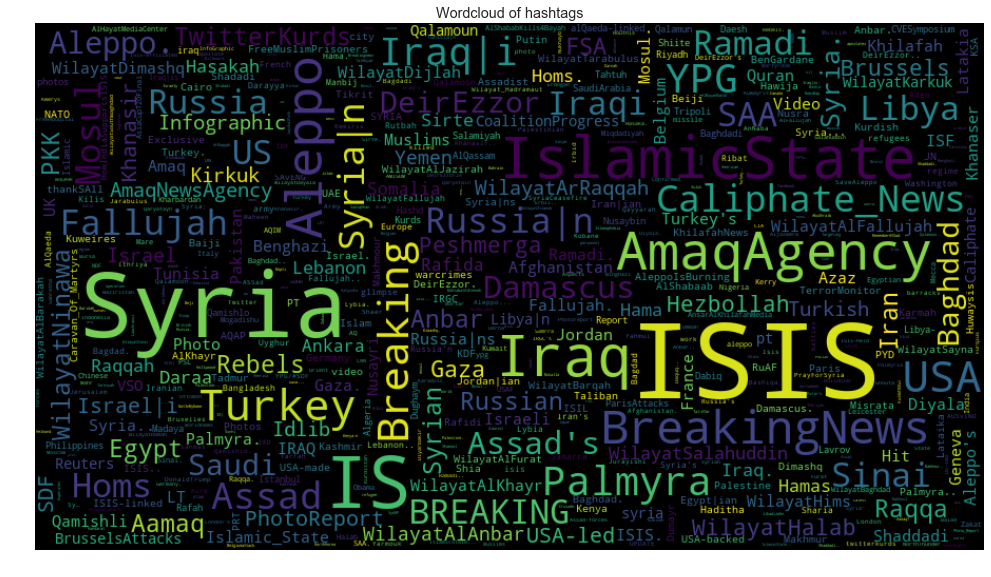

In [24]:
# Wordcloud hashtag frequencies - STYLE 1
all_hashtags = [item for sublist in df.hashtags for item in sublist]
# create a word frequency dictionary
wordfreq = Counter(all_hashtags)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                       height=500,
                       max_words=1000,
                       max_font_size=100,
                       relative_scaling=0.5,
                       normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of hashtags")
plt.savefig("figures_exam_project/hashtags_wc.png")

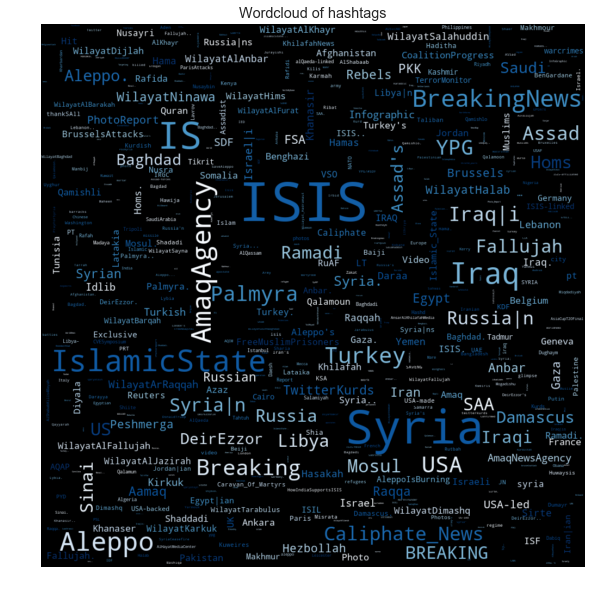

In [12]:
# Wordcloud hashtag frequencies - STYLE 2
all_hashtags = [item for sublist in df.hashtags for item in sublist]
# # create a word frequency dictionary
wordfreq = Counter(all_hashtags)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=1000,
                       height=1000,
                       max_words=1000,
                       max_font_size=100,
                       relative_scaling=0.5,
                       colormap='Blues',
                       normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of hashtags")
plt.show()

wc = WordCloud(height=1000, width=1000, max_words=1000).generate(" ".join(terms))


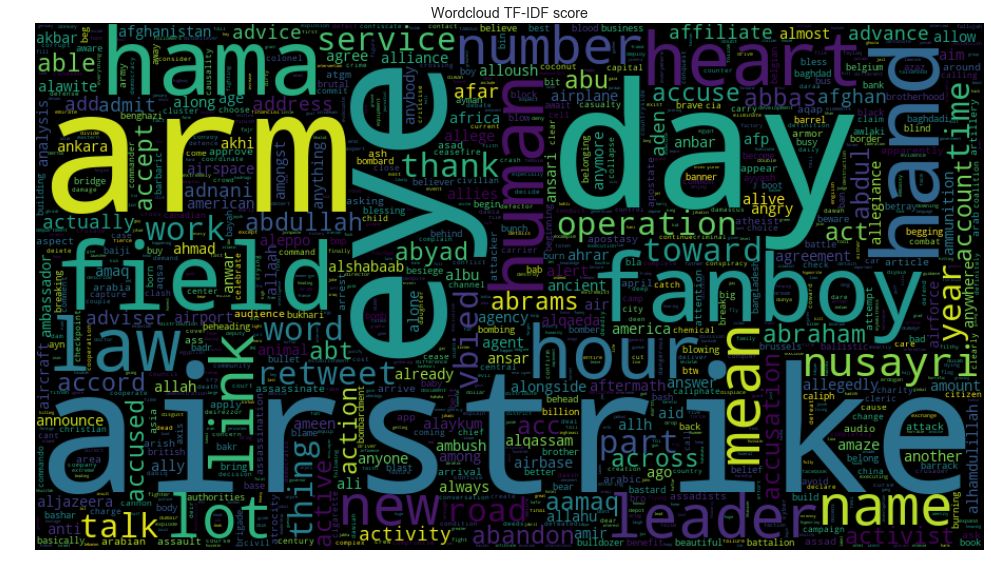

In [25]:
# Wordcloud using TF-IDF score: which words are particluarily important for each tweet? - STYLE 1
all_words = [item for sublist in df.tokens for item in sublist]

vec = TfidfVectorizer()
tfv = vec.fit_transform(all_words)

terms = vec.get_feature_names()
wc = WordCloud(width=900, height=500,max_words=1000).generate(" ".join(terms))

plt.figure(figsize=(17,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud TF-IDF score")
plt.savefig("figures_exam_project/tfidf_wc.png")

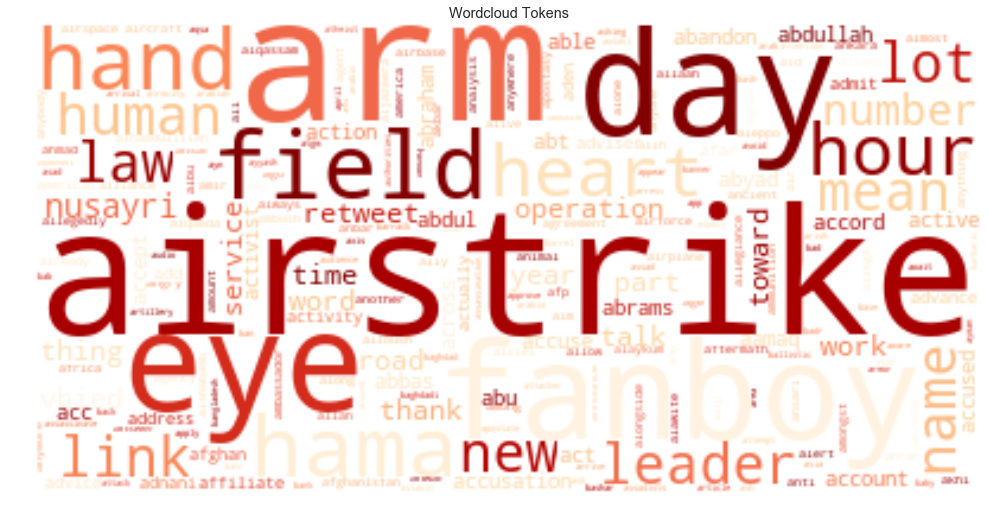

In [15]:
# Wordcloud using TF-IDF score: which words are particluarily important for each tweet? - STYLE 2
# Use other style
all_words = [item for sublist in df.tokens for item in sublist]

vec = TfidfVectorizer()
tfv = vec.fit_transform(all_words)

terms = vec.get_feature_names()
wc = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='red', colormap='OrRd').generate(" ".join(terms))

plt.figure(figsize=(17,14))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud TF-IDF score")
plt.show()

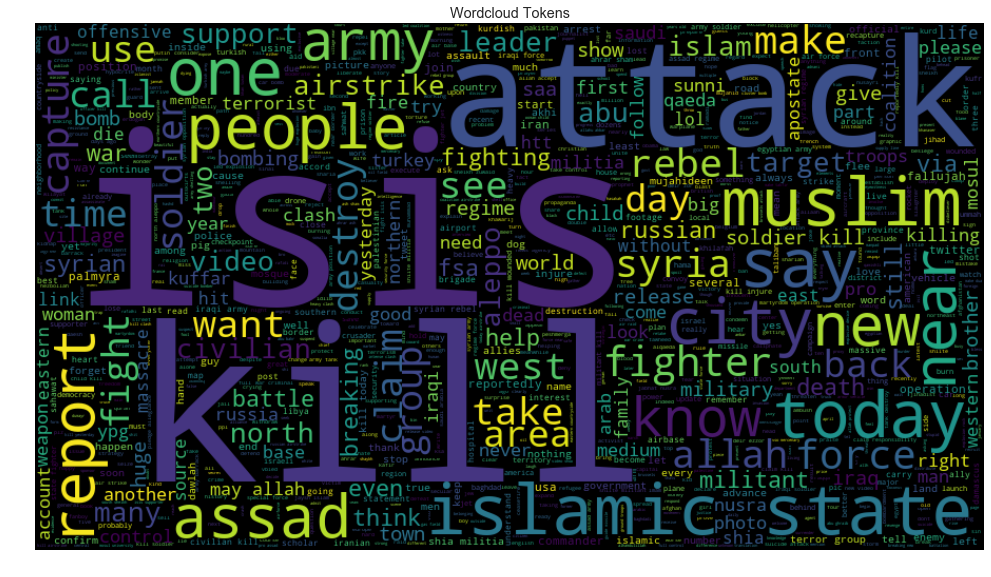

In [23]:
# Wordcloud cleaned and pre-processed words frequencies - lemmatized - VERSION 1
long_string = ','.join(all_words3)
wordcloud = WordCloud(width=900, height=500,max_words=1000).generate(long_string)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud Tokens")
plt.savefig("figures_exam_project/tokens_wc.png")

n_w
username     word           
04_8_1437    force        13
             kill         12
             fighter      10
             iraqi        10
             hit           9
06230550_IS  islamic       5
             like          5
             state         5
             video         5
             attack        4
1515Ummah    kill         14
             attack       11
             aamaq         8
             destroy       7
             area          6
1Dawlah_III  city         33
             mosul         9
             work          9
             state         8
             tour          7
432Mryam     allah         5
             life          4
             may           4
             death         3
             going         3
ALK___226    city          3
             force         2
             hit           2
             iraqi         2
             operation     2
...                      ...
war_analysis isis          9
             kill          7
             state         7
             army          6
             attack        6
warreporter2 know         33
             victory      13
             lol          12
             sheikh       12
             new          10
warrnews     kill        166
             soldier     113
             near         95
             today        90
             militant     87
wayf44rerr   kill         82
             today        65
             airstrikes   51
             army         42
             egyptian     35
wayff44rer   egyptian      4
             explosion     4
             target        4
             airstrikes    3
             army          3
wayyf44rer   today        13
             airstrikes   10
             kill          8
             target        8
             army          7

[555 rows x 1 columns]

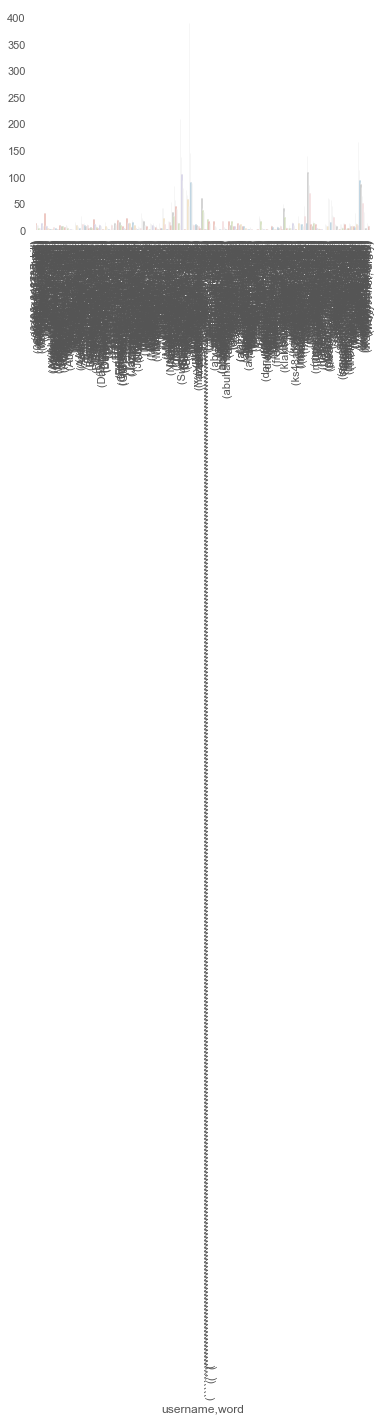

In [44]:
# TF-IDF score per word per user
# Break words into different rows, by username
rows = list()
for row in df[['username', 'tokens']].iterrows():
    r = row[1]
    for word in r.tokens:
        rows.append((r.username, word))

tweets_words = pd.DataFrame(rows, columns=['username', 'word'])
# Regroup by username
counts = tweets_words.groupby('username')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
# Shows number of words for each username
# Note: the graph is not very easy to look at - we still have too many words to make a meaningful visualization
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()

pretty_plot_top_n(counts['n_w'])

In [45]:
# Shows total number of words foreach username over entire timeperiod - 112 unique usernames, sorted by name
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
username,
04_8_1437,284
06230550_IS,299
1515Ummah,615
1Dawlah_III,363
432Mryam,110
ALK___226,45
AbdusMujahid149,182
AbuLaythAlHindi,67
AbuMusab_110,513


In [46]:
# Calculates TF for each word by username
tf = counts.join(word_sum)
tf['tf'] = tf.n_w/tf.n_d
tf.head()

n_w  n_d        tf
username  word                       
04_8_1437 force     13  284  0.045775
          kill      12  284  0.042254
          fighter   10  284  0.035211
          iraqi     10  284  0.035211
          hit        9  284  0.031690

tf
username     word                
04_8_1437    force       0.045775
             kill        0.042254
             fighter     0.035211
             iraqi       0.035211
             hit         0.031690
06230550_IS  islamic     0.016722
             like        0.016722
             state       0.016722
             video       0.016722
             attack      0.013378
1515Ummah    kill        0.022764
             attack      0.017886
             aamaq       0.013008
             destroy     0.011382
             area        0.009756
1Dawlah_III  city        0.090909
             mosul       0.024793
             work        0.024793
             state       0.022039
             tour        0.019284
432Mryam     allah       0.045455
             life        0.036364
             may         0.036364
             death       0.027273
             going       0.027273
ALK___226    city        0.066667
             force       0.044444
             hit         0.044444
             iraqi       0.044444
             operation   0.044444
...                           ...
war_analysis isis        0.015707
             kill        0.012216
             state       0.012216
             army        0.010471
             attack      0.010471
warreporter2 know        0.031369
             victory     0.012357
             lol         0.011407
             sheikh      0.011407
             new         0.009506
warrnews     kill        0.026581
             soldier     0.018094
             near        0.015212
             today       0.014412
             militant    0.013931
wayf44rerr   kill        0.039010
             today       0.030923
             airstrikes  0.024263
             army        0.019981
             egyptian    0.016651
wayff44rer   egyptian    0.048193
             explosion   0.048193
             target      0.048193
             airstrikes  0.036145
             army        0.036145
wayyf44rer   today       0.033419
             airstrikes  0.025707
             kill        0.020566
             target      0.020566
             army        0.017995

[555 rows x 1 columns]

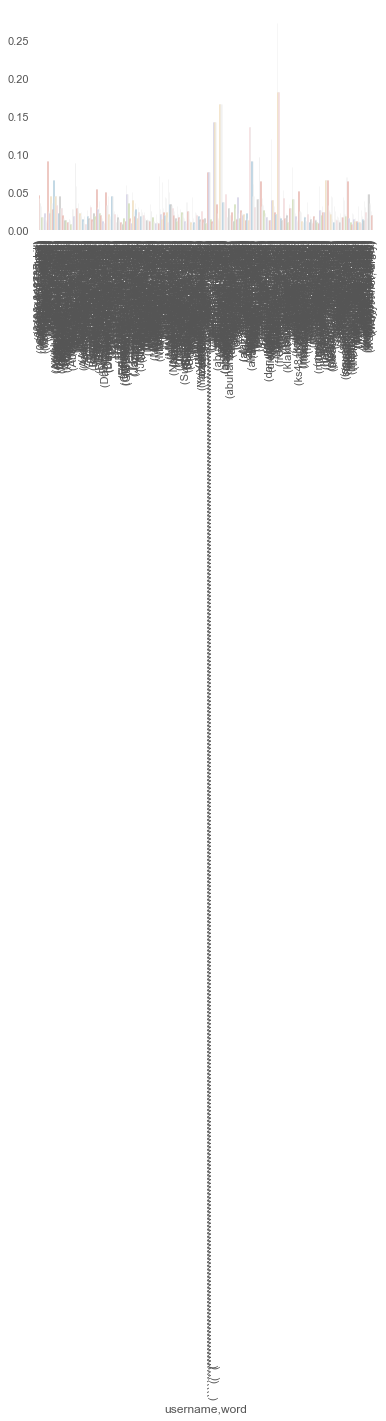

In [47]:
# Note for visualization: We should do this only for the most important users
pretty_plot_top_n(tf['tf'])

In [48]:
# 112 unique users
c_d = tweets_words.username.nunique()
# Calculate IDF 
idf = tweets_words.groupby('word')\
    .username\
    .nunique()\
    .to_frame()\
    .rename(columns={'username':'i_d'})\
    .sort_values('i_d')
idf['idf'] = np.log(c_d/idf.i_d.values)
tf_idf = tf.join(idf)
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
username  word                                                
04_8_1437 force     13  284  0.045775   77  0.365725  0.016741
          kill      12  284  0.042254   88  0.232193  0.009811
          fighter   10  284  0.035211   70  0.461035  0.016234
          iraqi     10  284  0.035211   64  0.550647  0.019389
          hit        9  284  0.031690   45  0.902868  0.028612

tf_idf
username     word                  
04_8_1437    rig           0.043663
             hit           0.028612
             unit          0.028357
             assault       0.026277
             kurdish       0.024997
06230550_IS  bash          0.031105
             shariah       0.020082
             honest        0.018486
             jabhat        0.017710
             sin           0.017195
1515Ummah    aamaq         0.025196
             scum          0.014469
             pkk           0.013437
             ypg           0.013095
             troops        0.010985
1Dawlah_III  tour          0.048447
             city          0.036860
             quick         0.032152
             work          0.030838
             glimpse       0.030453
432Mryam     shall         0.047820
             forgive       0.040448
             life          0.037115
             judge         0.036391
             going         0.033922
ALK___226    outskirts     0.058148
             mobilization  0.044477
             hummer        0.041696
             mistake       0.040426
             hit           0.040127
...                             ...
war_analysis vso           0.016373
             jet           0.013364
             mercenary     0.013098
             joining       0.011228
             several       0.010585
warreporter2 revelation    0.030892
             crusade       0.018954
             know          0.017767
             victory       0.017470
             lol           0.013837
warrnews     militant      0.015305
             alqassam      0.008295
             hamas         0.008094
             soldier       0.008086
             today         0.007936
wayf44rerr   zuwaid        0.037944
             egyptian      0.024168
             zor           0.023804
             explosion     0.022586
             rafahh        0.022134
wayff44rer   rafahh        0.120117
             sukhna        0.080078
             explosion     0.073806
             egyptian      0.069949
             foot          0.063376
wayyf44rer   zuwaid        0.034172
             ied           0.022992
             egyptian      0.022387
             qaryatayn     0.021313
             explosion     0.019685

[555 rows x 1 columns]

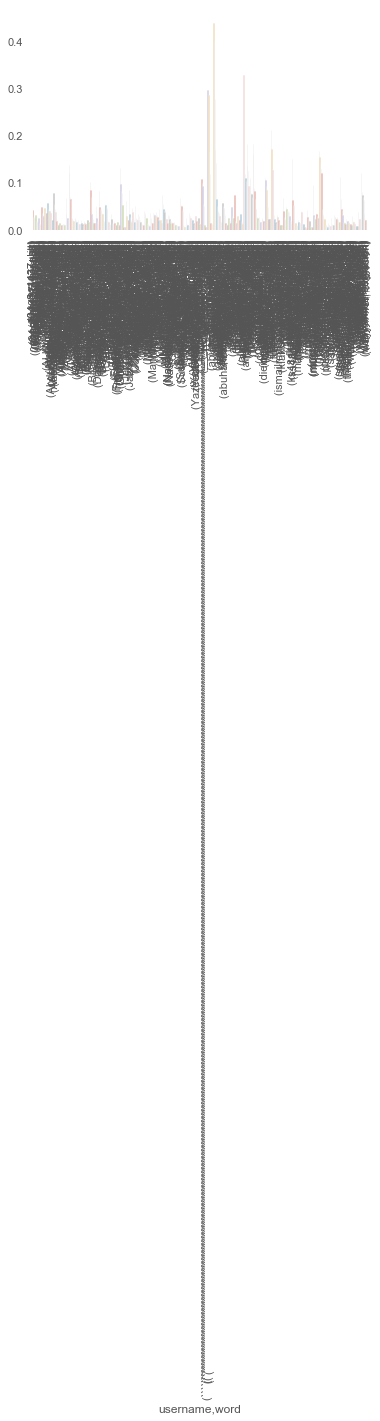

In [49]:
pretty_plot_top_n(tf_idf['tf_idf'])